In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/titanic3.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
data = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S


In [5]:
data.dropna(inplace=True)
data.describe()

,pclass,age,sibsp,parch,fare
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,29.813199,0.504314,0.421860,36.603024
std,0.840685,14.366261,0.913080,0.840655,55.753648
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.750000
75%,3.000000,39.000000,1.000000,1.000000,35.077100
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
np.ptp(data.age)

79.8333

In [7]:
np.ptp(data.fare)

512.3292

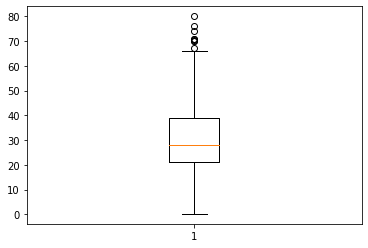

In [8]:
plt.boxplot(data.age)
plt.show()

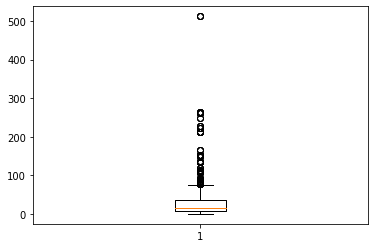

In [9]:
plt.boxplot(data.fare)
plt.show()

### Có khoảng cách lớn giữa max và min
### 2 thang đo 2 cột khác nhau

In [10]:
data.age.skew()

0.40688028266803467

In [11]:
data.fare.skew()

4.122508729348891

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


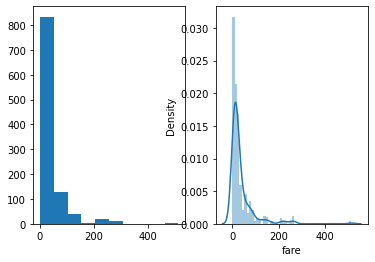

In [12]:
plt.subplot(1, 2, 1)
plt.hist(data.fare)
plt.subplot(1, 2, 2)
sns.distplot(data.fare)
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


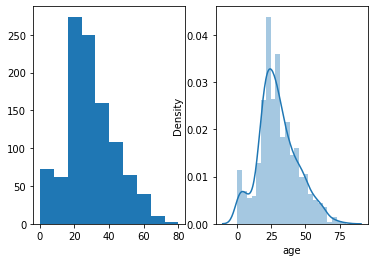

In [13]:
plt.subplot(1, 2, 1)
plt.hist(data.age)
plt.subplot(1, 2, 2)
sns.distplot(data.age)
plt.show()

### Age tương đối chuẩn, fare lệch phải
### Có outlier
### => Chọn Robust Scaler ?? Standard Scaler ?? Kiểm chứng bằng mô hình

In [14]:
from sklearn import preprocessing

In [15]:
age_fare = data[['age', 'fare']].astype('float64')
age_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1043 non-null   float64
 1   fare    1043 non-null   float64
dtypes: float64(2)
memory usage: 24.4 KB


### Robust Scaler

In [16]:
scaler = preprocessing.RobustScaler()
robust_scaler = scaler.fit_transform(age_fare)
df = pd.DataFrame(robust_scaler, columns=['age_scaler', 'fare_scaler'])
df.head()

,age_scaler,fare_scaler
0,0.055556,7.236718
1,-1.504628,5.024586
2,-1.444444,5.024586
3,0.111111,5.024586
4,-0.166667,5.024586


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age_scaler   1043 non-null   float64
 1   fare_scaler  1043 non-null   float64
dtypes: float64(2)
memory usage: 16.4 KB


In [18]:
data['age_scaler'] = df.age_scaler.values
data['fare_scaler'] = df.age_scaler.values
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,age_scaler,fare_scaler
0,1,female,29.0000,0,0,211.3375,S,0.055556,0.055556
1,1,male,0.9167,1,2,151.5500,S,-1.504628,-1.504628
2,1,female,2.0000,1,2,151.5500,S,-1.444444,-1.444444
3,1,male,30.0000,1,2,151.5500,S,0.111111,0.111111
4,1,female,25.0000,1,2,151.5500,S,-0.166667,-0.166667


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1043 non-null   int64  
 1   sex          1043 non-null   object 
 2   age          1043 non-null   float64
 3   sibsp        1043 non-null   int64  
 4   parch        1043 non-null   int64  
 5   fare         1043 non-null   float64
 6   embarked     1043 non-null   object 
 7   age_scaler   1043 non-null   float64
 8   fare_scaler  1043 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 81.5+ KB


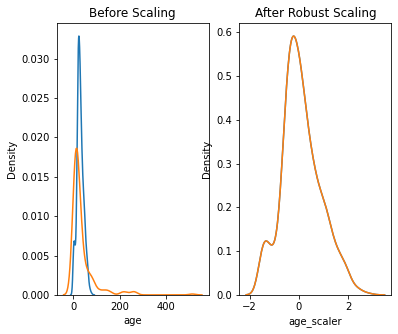

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(data['age'], ax=ax1)
sns.kdeplot(data['fare'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(data['age_scaler'], ax=ax2)
sns.kdeplot(data['fare_scaler'], ax=ax2)

plt.show()

In [21]:
scaler1 = preprocessing.StandardScaler()
ss_scaler = scaler1.fit_transform(age_fare)
df1 = pd.DataFrame(ss_scaler, columns=['age_ss', 'fare_ss'])
df1.head()

,age_ss,fare_ss
0,-0.056632,3.135549
1,-2.012379,2.062683
2,-1.936937,2.062683
3,0.013009,2.062683
4,-0.335196,2.062683


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


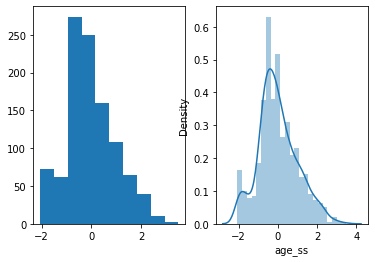

In [22]:
plt.subplot(1, 2, 1)
plt.hist(df1.age_ss)
plt.subplot(1, 2, 2)
sns.distplot(df1.age_ss)
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


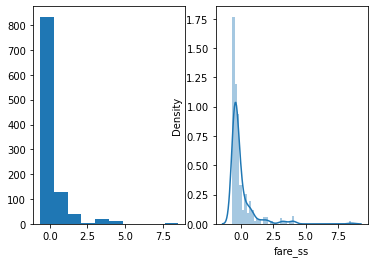

In [23]:
plt.subplot(1, 2, 1)
plt.hist(df1.fare_ss)
plt.subplot(1, 2, 2)
sns.distplot(df1.fare_ss)
plt.show()

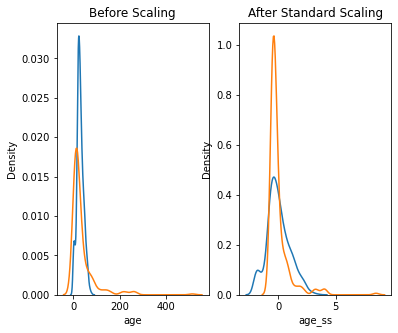

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(data['age'], ax=ax1)
sns.kdeplot(data['fare'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(df1['age_ss'], ax=ax2)
sns.kdeplot(df1['fare_ss'], ax=ax2)

plt.show()